# **Data Analysis Project: E-Commerce Public Dataset**
- **Name:** Bayu Siddhi Mukti
- **Email:** bayu2mukti18@gmail.com
- **Dicoding ID:** bayu_siddhi_mukti

## **Determining Business Questions**

- How has the company performed in sales and revenue in the last few months?
- What product categories are the most, least sold, and most profitable?
- What payment methods are the most and least used?
- Which cities or states are the ones with the most orders and spending?
- How satisfied are customers with the buying and selling process/products provided?

Advanced analysis (RMF):
- When was the last time each registered customer made a transaction? (Recency)
- How often did each registered customer make a purchase in the last few months? (Frequency)
- How much money did each registered customer spend in the last few months? (Monetary)

## **Import All Used Packages/Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

## **Data Wrangling**

### **Gathering Data**

The dataset used is the **Brazilian E-Commerce Public Dataset by Olist**.

The dataset was downloaded from the Google Drive link provided by Dicoding or through the [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) source.

Based on the "About Dataset" information on [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), this e-commerce dataset is a dataset containing data on 100 thousand purchases of goods through marketplaces in Brazil from 2016 to 2018. The available features allow users to view orders through various dimensions, such as order status, price, payment method, customer location, product attributes, and customer reviews.

The entire dataset has been saved in the `./data` directory in `.csv` format.

In [2]:
# Define the location of each dataset in the dictionary
DATA_DIRECTORY = "data"

def data_path(filename: str) -> str:
    return os.path.join(DATA_DIRECTORY, filename)

data = {
    "sellers": data_path("sellers_dataset.csv"),
    "customers": data_path("customers_dataset.csv"),
    "geolocation": data_path("geolocation_dataset.csv"),
    "product_category": data_path("product_category_name_translation.csv"),
    "products": data_path("products_dataset.csv"),
    "orders": data_path("orders_dataset.csv"),
    "order_payments": data_path("order_payments_dataset.csv"),
    "order_items": data_path("order_items_dataset.csv"),
    "order_reviews": data_path("order_reviews_dataset.csv")
}

For all `.csv` data can be used for analysis, the data will be loaded into a Pandas `DataFrame` form.

In [3]:
# Load the entire .csv dataset file into a Pandas DataFrame.
sellers_df = pd.read_csv(data["sellers"])
customers_df = pd.read_csv(data["customers"])
geolocation_df = pd.read_csv(data["geolocation"])
product_category_df = pd.read_csv(data["product_category"])
products_df = pd.read_csv(data["products"])
orders_df = pd.read_csv(data["orders"])
order_payments_df = pd.read_csv(data["order_payments"])
order_items_df = pd.read_csv(data["order_items"])
order_reviews_df = pd.read_csv(data["order_reviews"])

The following is an example of the contents of each `.csv` dataset.

In [4]:
# View seller data contents
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [5]:
# View customer data content
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
# View the geolocation data content of each zip code
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [7]:
# View product data contents
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
# View product category content in English
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [9]:
# View order data contents
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
# View the contents of the order payment method data
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [11]:
# View order details
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [12]:
# View customer review data content
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Based on the source [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), several insights were obtained related to all datasets that will be used. This is important to know so that comprehensive knowledge of all datasets can be achieved, so that the data analysis process according to business needs can be carried out as expected.

**Insight:**
- The available dataset consists of nine `.csv` files with the following descriptions.
  - `sellers_df`: Contains data on sellers who fulfill each order that has been made.
  - `customers_df`: Contains customer data every time an order is made.
  - `geolocation_df`: Contains postal code data in Brazil along with its latitude and longitude coordinates.
  - `products_df`: Contains data on a list of products sold in the marketplace.
  - `product_category_df`: Contains data on the translation of Portuguese to English category names.
  - `orders_df`: Contains general data on all orders that have been made and their status.
  - `order_payments_df`: Contains payment data from each order made.
  - `order_items_df`: Contains detailed data on products purchased in each order made.
  - `order_reviews_df`: Contains review data made by customers after the item arrives or the estimated date of arrival has passed.
- Other information that was successfully obtained is
  - An order can have more than one product.
  - Each product can come from a different seller.
- The source [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) also includes the database schema where the dataset comes from. By knowing this information, the data that was initially normalized from the database can be denormalized to facilitate data analysis.
<br><br>
<img src="images/schema.png" alt="Database Schema" width="720">

### **Assessing Data**

Before starting to analyze the E-Commerce Public Dataset data, it is necessary to conduct a data assessment and cleaning first. Data assessment is carried out with the aim of understanding the characteristics of the data and finding errors/deficiencies that still exist in the data. By knowing this, the dirty data can be cleaned in the next process, and then ready to be used for the analysis process.

#### **Assessing `sellers_df` Data**

In [13]:
# View variable information in seller data
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
# View the number of unique data in each seller data variable
print("Number of unique data:")
print(sellers_df.nunique())

Number of unique data:
seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64


In [15]:
# See the number of empty data in each seller data variable
print("Number of empty data:")
print(sellers_df.isna().sum())

Number of empty data:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [16]:
# View the number of duplicate data in each row of seller data
print("Number of duplicate rows:", end=" ")
print(sellers_df.duplicated().sum())

Number of duplicate rows: 0


In [17]:
# View descriptive parameter data from each numeric variable of seller data
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### **Assessing `customers_df` Data**

In [18]:
# View variable information in customer data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
# View the number of unique data in each customer data variable
print("Number of unique data:")
print(customers_df.nunique())

Number of unique data:
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64


In [20]:
# See the number of empty data in each customer data variable
print("Number of empty data:")
print(customers_df.isna().sum())

Number of empty data:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [21]:
# View the number of duplicate data in each row of customer data
print("Number of duplicate rows:", end=" ")
print(customers_df.duplicated().sum())

Number of duplicate rows: 0


In [22]:
# View descriptive parameter data of each numeric variable of customer data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### **Assessing `geolocation_df` Data**

In [23]:
# View variable information in customer data
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [24]:
# View the number of unique data in each geolocation data variable
print("Number of unique data:")
print(geolocation_df.nunique())

Number of unique data:
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64


In [25]:
# See the number of empty data in each geolocation data variable
print("Number of empty data:")
print(geolocation_df.isna().sum())

Number of empty data:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [26]:
# View the number of duplicate data in each row of geolocation data
print("Number of duplicate rows:", end=" ")
print(geolocation_df.duplicated().sum())

Number of duplicate rows: 261831


In [27]:
# View descriptive parameter data of each numeric variable of geolocation data
geolocation_df.describe().round(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1000163.000,1000163.000,1000163.000
mean,36574.166,-21.176,-46.391
std,30549.336,5.716,4.270
min,1001.000,-36.605,-101.467
25%,11075.000,-23.604,-48.573
50%,26530.000,-22.919,-46.638
75%,63504.000,-19.980,-43.768
max,99990.000,45.066,121.105


#### **Assessing `product_category_df` Data**

In [28]:
# View variable information in product category data
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [29]:
# View the number of unique data in each product category data variable
print("Number of unique data:")
print(product_category_df.nunique())

Number of unique data:
product_category_name            71
product_category_name_english    71
dtype: int64


In [30]:
# See the number of empty data in each product category data variable
print("Number of empty data:")
print(product_category_df.isna().sum())

Number of empty data:
product_category_name            0
product_category_name_english    0
dtype: int64


In [31]:
# See the number of duplicate data in each row of product category data
print("Number of duplicate rows:", end=" ")
print(product_category_df.duplicated().sum())

Number of duplicate rows: 0


#### **Assessing `products_df` Data**

In [32]:
# View variable information in product data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
# See the number of unique data in each product data variable
print("Number of unique data:")
print(products_df.nunique())

Number of unique data:
product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64


In [34]:
# View all unique product category data
products_df["product_category_name"].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [35]:
# Compare categories in product_category_df with products_df
product_unique = products_df["product_category_name"].unique()
product_category_unique = product_category_df["product_category_name"].unique()

print("Number of unique product categories in product data :", len(product_unique))
print("Number of unique product categories in product category data :", len(product_category_unique))
print("Category difference :", set(product_unique) - set(product_category_unique))

Number of unique product categories in product data : 74
Number of unique product categories in product category data : 71
Category difference : {'portateis_cozinha_e_preparadores_de_alimentos', nan, 'pc_gamer'}


In [36]:
# See the number of empty data in each product data variable
print("Number of empty data:")
print(products_df.isna().sum())

Number of empty data:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [37]:
# Get data rows whose product description is empty
nan_product_desc_df = products_df[
    products_df["product_category_name"].isna() |
    products_df["product_name_lenght"].isna() |
    products_df["product_description_lenght"].isna() |
    products_df["product_photos_qty"].isna()
].copy()

print("Number of product data with incomplete description:", len(nan_product_desc_df))
display(nan_product_desc_df)

Number of product data with incomplete description: 610


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [38]:
# Get data rows whose product size is empty
nan_product_size_df = products_df[
    products_df["product_weight_g"].isna() |
    products_df["product_length_cm"].isna() |
    products_df["product_height_cm"].isna() |
    products_df["product_width_cm"].isna()
].copy()

print("Number of product data with incomplete size:", len(nan_product_size_df))
display(nan_product_size_df)

Number of product data with incomplete size: 2


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Get all products whose data is empty
nan_product_all_df = pd.merge(
    left=nan_product_desc_df,
    right=nan_product_size_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

print("Number of product data whose data is all empty:", len(nan_product_all_df))
display(nan_product_all_df)

Number of product data whose data is all empty: 1


,product_id,product_category_name_x,product_name_lenght_x,product_description_lenght_x,product_photos_qty_x,product_weight_g_x,product_length_cm_x,product_height_cm_x,product_width_cm_x,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# See the number of duplicate data in each row of product data
print("Number of duplicate rows:", end=" ")
print(products_df.duplicated().sum())

Number of duplicate rows: 0


In [41]:
# View descriptive parameter data of each numeric variable of product data
products_df.describe().round(3)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000,32341.000,32341.000,32949.000,32949.000,32949.000,32949.000
mean,48.477,771.495,2.189,2276.472,30.815,16.938,23.197
std,10.246,635.115,1.737,4282.039,16.914,13.638,12.079
min,5.000,4.000,1.000,0.000,7.000,2.000,6.000
25%,42.000,339.000,1.000,300.000,18.000,8.000,15.000
50%,51.000,595.000,1.000,700.000,25.000,13.000,20.000
75%,57.000,972.000,3.000,1900.000,38.000,21.000,30.000
max,76.000,3992.000,20.000,40425.000,105.000,105.000,118.000


#### **Assessing `orders_df` Data**

In [42]:
# View variable information in order data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [43]:
# View the number of unique data in each order data variable
print("Number of unique data:")
print(orders_df.nunique())

Number of unique data:
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


In [44]:
# View all order_status categories
orders_df["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [45]:
# See the number of empty data in each order data variable
print("Number of empty data:")
print(orders_df.isna().sum())

Number of empty data:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [46]:
# Get order data rows whose order_approved_at is empty
nan_order_approved_at_df = orders_df[orders_df["order_approved_at"].isna()].copy()
print("Number of order data with empty approved_at:", len(nan_order_approved_at_df))
display(nan_order_approved_at_df)

Number of order data with empty approved_at: 160


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [47]:
# Get order data rows whose order_delivered_carrier_date is empty
nan_order_delivered_carrier_date_df = orders_df[orders_df["order_delivered_carrier_date"].isna()].copy()
print("Number of order data with empty order_delivered_carrier_date:", len(nan_order_delivered_carrier_date_df))
display(nan_order_delivered_carrier_date_df)

Number of order data with empty order_delivered_carrier_date: 1783


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [48]:
# Get order data rows whose order_delivered_customer_date is empty
nan_order_delivered_customer_date_df = orders_df[orders_df["order_delivered_customer_date"].isna()].copy()
print("Number of order data with empty order_delivered_customer_date:", len(nan_order_delivered_customer_date_df))
display(nan_order_delivered_customer_date_df)

Number of order data with empty order_delivered_customer_date: 2965


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [49]:
# Get order data rows where order_approved_at, carrier_date, and customer_date are empty.
nan_order_all_df = orders_df[
    orders_df["order_approved_at"].isna() &
    orders_df["order_delivered_carrier_date"].isna() &
    orders_df["order_delivered_customer_date"].isna()
].copy()

print("Number of order data with all three empty:", len(nan_order_all_df))
display(nan_order_all_df)

Number of order data with all three empty: 146


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [50]:
# See the number of duplicate data in each row of order data
print("Number of duplicate rows:", end=" ")
print(orders_df.duplicated().sum())

Number of duplicate rows: 0


#### **Assessing `order_payments` Data**

In [51]:
# View variable information in order payments data
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [52]:
# View the number of unique data in each variable data order payments
print("Number of unique data:")
print(order_payments_df.nunique())

Number of unique data:
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64


In [53]:
# View unique data in the payment_sequential, payment_type, and payment_installments variables
print("Unique value in payment_type         :", order_payments_df["payment_type"].unique())
print("Unique value in payment_installments :", order_payments_df["payment_installments"].unique())
print("Unique value in payment_sequential   :", order_payments_df["payment_sequential"].unique())

Unique value in payment_type         : ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
Unique value in payment_installments : [ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23]
Unique value in payment_sequential   : [ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]


In [54]:
# See the number of empty data in each variable data order payments
print("Number of empty data:")
print(order_payments_df.isna().sum())

Number of empty data:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [55]:
# View the number of duplicate data in each row of order payments data
print("Number of duplicate rows:", end=" ")
print(order_payments_df.duplicated().sum())

Number of duplicate rows: 0


In [56]:
# View descriptive parameter data of each numeric variable of order payments data
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### **Assessing `order_items_df` Data**

In [57]:
# View variable information in order items data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [58]:
# See the number of unique data in each order items data variable
print("Number of unique data:")
print(order_items_df.nunique())

Number of unique data:
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


In [59]:
# See the number of empty data in each order items data variable
print("Number of empty data:")
print(order_items_df.isna().sum())

Number of empty data:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [60]:
# See the number of duplicate data in each row of order items data
print("Number of duplicate rows:", end=" ")
print(order_items_df.duplicated().sum())

Number of duplicate rows: 0


In [61]:
# View descriptive parameter data of each numeric variable of order items data
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### **Assessing `order_reviews_df` Data**

In [62]:
# View variable information in order reviews data
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [63]:
# See the number of unique data in each order reviews data variable
print("Number of unique data:")
print(order_reviews_df.nunique())

Number of unique data:
review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64


In [64]:
# View review_score category
print("review_score category:", order_reviews_df["review_score"].unique())

review_score category: [4 5 1 3 2]


In [65]:
# See the number of empty data in each order reviews data variable
print("Number of empty data:")
print(order_reviews_df.isna().sum())

Number of empty data:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [66]:
# View example of order reviews data that does not have a comment title or message
order_reviews_df[
    order_reviews_df["review_comment_title"].isna() |
    order_reviews_df["review_comment_message"].isna()
]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [67]:
# View the number of duplicate data in each row of order reviews data
print("Number of duplicate rows:", end=" ")
print(order_reviews_df.duplicated().sum())

Number of duplicate rows: 0


In [68]:
# View descriptive parameter data of each numeric variable of order reviews data
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- From this data assessment stage, an assessment has been carried out on nine data that will be used. The assessment was carried out to obtain information related to the type of data, whether there are missing values, whether there is duplicate data, and whether there is data inaccuracy. The results of the assessment are summarized in the following table.

| Data                | Data Type                                                                                                                                                             | Missing Value                                                                                                                                                                                                                                                       | Duplicate Data                     | Inaccurate Data                                                                             | Notes                                                                                                                                                       |
|---------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| sellers_df          | -                                                                                                                                                                     | -                                                                                                                                                                                                                                                                   | -                                  | -                                                                                           | -                                                                                                                                                             |
| customers_df        | -                                                                                                                                                                     | -                                                                                                                                                                                                                                                                   | -                                  | -                                                                                           | -                                                                                                                                                             |
| geolocation_df      | -                                                                                                                                                                     | -                                                                                                                                                                                                                                                                   | There are 261831 duplicate data | -                                                                                           | -                                                                                                                                                             |
| product_category_df | -                                                                                                                                                                     | -                                                                                                                                                                                                                                                                   | -                                  | -                                                                                           | -                                                                                                                                                             |
| products_df         | -                                                                                                                                                                     | There are 610 missing values ​​in the variables `product_category_name`, `product_name_length`, `product_description_length`, and `product_photos_qty`, 2 missing values ​​in the variables `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm` | -                                  | There are 2 categories in `product_category_name` that are not in `product_category_df` | There is a difference in the number of product categories in `product_category_df` and `products_df`                                                                            |
| orders_df           | There are data type errors for the variables `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` | There are 160 missing values ​​in the `order_approved_at` variable, 1783 in the `order_delivered_carrier_date` variable, and 2965 in the `order_delivered_customer_date` variable                                                                                             | -                                  | -                                                                                           | Missing value can occur for 3 reasons, namely `order_status = "canceled"`, the order has not been sent to the logistics partner, and the order has not reached the customer |
| order_payments_df   | -                                                                                                                                                                     | -                                                                                                                                                                                                                                                                   | -                                  | -                                                                                           | -                                                                                                                                                             |
| order_items_df      | There is a data type error for the variable `shipping_limit_date`                                                                                                     | -                                                                                                                                                                                                                                                                   | -                                  | -                                                                                           | -                                                                                                                                                             |
| order_reviews_df    | There are data type errors for the variables `review_creation_date` and `review_answer_timestamp`                                                                      | There are 87656 missing values ​​in the `review_comment_title` variable, and 58247 in the `review_comment_message` variable                                                                                                                                                 | -                                  | -                                                                                           | Missing value occurs because customers are not required to write the comment title and comment content                                                                         |

### **Cleaning Data**

Based on the characteristics or conditions of the data found in the previous data assessing stage, the data will be cleaned or repaired so that it is clean and can be used for the analysis process.

#### **Cleaning `geolocation_df`**

##### **Handling Duplicate Data**

In [69]:
# Remove duplicate data
geolocation_df.drop_duplicates(inplace=True)
print("Number of duplicate rows:", end=" ")
print(geolocation_df.duplicated().sum())

Number of duplicate rows: 0


#### **Cleaning `products_df`**

##### **Handling Missing Value**

Overcoming missing values ​​by removing data rows containing missing values ​​is not the right choice, because valuable information from the product can be lost. Meanwhile, the interpolation method also cannot be done because the data owned is not sequential data like time series. Therefore, to overcome missing values ​​in variables in the `products_df` data or in other data, the imputation method will be used.
- For numeric variables such as `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm`, the imputation method will be carried out based on the average value (mean).
- Meanwhile, to overcome missing values ​​in categorical variables, namely `product_category_name`, the imputation method will be carried out based on the most frequently appearing value (mode).

In [70]:
# Get the mean value of all numeric variables that contain np.nan values ​​and perform imputation
products_df_numeric_variabel = {
    "product_name_lenght": np.round(products_df["product_name_lenght"].mean(), decimals=0),
    "product_description_lenght": np.round(products_df["product_description_lenght"].mean(), decimals=0),
    "product_photos_qty": np.round(products_df["product_photos_qty"].mean(), decimals=0),
    "product_weight_g": np.round(products_df["product_weight_g"].mean(), decimals=0),
    "product_length_cm": np.round(products_df["product_length_cm"].mean(), decimals=0),
    "product_height_cm": np.round(products_df["product_height_cm"].mean(), decimals=0),
    "product_width_cm": np.round(products_df["product_width_cm"].mean(), decimals=0)
}

for column, mean in products_df_numeric_variabel.items():
    products_df[column] = products_df[column].fillna(value=mean, inplace=False)

In [71]:
nan_product_numeric_df = products_df[
    products_df["product_name_lenght"].isna() |
    products_df["product_description_lenght"].isna() |
    products_df["product_photos_qty"].isna() |
    products_df["product_weight_g"].isna() |
    products_df["product_length_cm"].isna() |
    products_df["product_height_cm"].isna() |
    products_df["product_width_cm"].isna()
]

print("Number of products with numeric variables np.nan:", len(nan_product_numeric_df))

Number of products with numeric variables np.nan: 0


In [72]:
# Get the most categories in products_df
most_category = products_df.groupby(by="product_category_name").\
    agg({"product_id": "nunique"}).sort_values(by="product_id", ascending=False).iloc[0].name

print("Product categories with the largest number:", most_category)

Product categories with the largest number: cama_mesa_banho


In [73]:
# Change the value of np.nan category to most_category
products_df["product_category_name"] = products_df["product_category_name"].fillna(value=most_category, inplace=False)
print("Number of products with category np.nan:", len(products_df[products_df["product_category_name"].isna()]))

Number of products with category np.nan: 0


##### **Handling Inaccurate Data**

Since there is a difference in category data in `products_df` and `product_category_df`, it is necessary to add the new category to `product_category_df`. The steps begin by getting the new category in `products_df`, then translating it from Portuguese to English, and inserting the new data into `product_category_df`.

In [74]:
# Get new categories in products df that do not exist in product_category df
product_unique = products_df["product_category_name"].unique()
product_category_unique = product_category_df["product_category_name"].unique()
new_category = list(set(product_unique) - set(product_category_unique))

print("Number of unique product categories in product data          :", len(product_unique))
print("Number of unique product categories in product category data :", len(product_category_unique))
print("New category :", new_category)

Number of unique product categories in product data          : 73
Number of unique product categories in product category data : 71
New category : ['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']


In [75]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [76]:
# Add new category to product_category pdf
new_category_list = list()
for category in new_category:
    new_category_list.append({
        "product_category_name": category,
        "product_category_name_english": GoogleTranslator(source='pt', target='en').translate(category)
    })
product_category_df = pd.concat([product_category_df, pd.DataFrame(new_category_list)], ignore_index=True)

print("Number of unique product categories in product data          :", len(product_unique))
print("Number of unique product categories in product category data :", len(product_category_df["product_category_name"].unique()))
display(product_category_df)

Number of unique product categories in product data          : 73
Number of unique product categories in product category data : 73


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_and_food_preparators


#### **Cleaning `orders_df`**

##### **Handling Data Type**

The variables `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` are variables that indicate date and time. Therefore, the data type of these five variables must be changed to `datetime`.

In [77]:
# Change the data type of the following five variables to datetime.
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


##### **Handling Missing Value**

Based on the Data Assessing process that has been carried out, it is known that missing values ​​in the variables `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` in the `orders_df` data occur for 3 reasons:
- `order_status = "canceled"`
- The order has not been sent to the logistics partner
- The order has not reached the customer

Therefore, all three variables are not filled in.

Based on these reasons, the missing values ​​in the three variables will be left as missing values, to indicate information that one of the three conditions is occurring.

#### **Cleaning ``order_items_df``**

##### **Handling Data Type**

The `shipping_limit_date` variable is a variable that shows the date and time. Therefore, the data type of the five variables must be changed to `datetime`.

In [78]:
# Change the data type of the shipping limit date variable to datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


#### **Cleaning ``order_reviews_df``**

##### **Handling Data Type**

The variables `review_creation_date` and `review_answer_timestamp` are variables that show date and time. Therefore, the data type of these five variables must be changed to `datetime`.

In [79]:
# Change the data type of the following two variables to datetime.
datetime_columns = [
    "review_creation_date",
    "review_answer_timestamp"
]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

print(order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


##### **Handling Missing Value**

Based on the Data Assessing process that has been carried out, it is known that the missing values ​​in the `review_comment_title` and `review_comment_message` variables in the `order_reviews_df` data occur for 2 reasons:
- Customers are not required to write a comment title
- Customers are not required to write a comment message
- The order has not arrived at the customer

Therefore, both variables are not filled in completely.

Based on these reasons, the missing values ​​in both variables will be left as missing values, to indicate information that one of the two conditions is occurring.

**Insight:**
- At this stage, efforts have been made to clean / improve the findings of the data conditions obtained in the previous stage (Assessing Data), so that the data is clean and can be used for the analysis process.
- In the `geolocation_df` data, duplicate data has been removed.
- In the `products_df` data, the imputation method has been carried out to overcome missing values ​​and data repair on inaccurate data.
- In the `orders_df` data, the data type adjustment process has been carried out for the `datetime` variable.
- In the `order_items_df` data, the data type adjustment process has been carried out for the `datetime` variable.
- In the `order_reviews_df` data, the data type adjustment process has been carried out for the `datetime` variable.
- In the `orders_df` and `order_reviews_df` data, the missing value is left as a missing value because the empty data in the variables there indicates certain conditions / information that is occurring.

## **Exploratory Data Analysis (EDA)**

Once the data has been assessed and cleaned, all data is ready to be analyzed. Exploratory Data Analysis (EDA) aims to explore and understand data, the process begins by defining various questions and finding some interesting insights from the data. In this case, EDA is done to find insights from the business questions that have been asked at the beginning.

### **Exploring `sellers_df` Data**

The `sellers_df` data contains information related to the seller ID, the origin zip code, and the name of the city and state where the seller is from. Based on this information, we can gain valuable insights into the distribution of all sellers in this e-commerce.

In [80]:
# Get information on the number of unique sellers
print("Number of unique sellers:", sellers_df["seller_id"].nunique())

Number of unique sellers: 3095


In [81]:
# View the distribution of sellers based on city of origin
sellers_df.groupby(by="seller_city")["seller_id"].nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

In [82]:
# View the distribution of sellers based on state of origin
sellers_df.groupby(by="seller_state")["seller_id"].nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AM       1
AC       1
PI       1
MA       1
PA       1
Name: seller_id, dtype: int64

### **Exploring `customers_df` Data**

Similar to the `sellers_df` data, the `customers_df` data also contains information related to the seller ID, the origin zip code, and the name of the city and state where the seller is from. Based on this information, we can gain valuable insights into the distribution of all registered customers on this e-commerce.

In [83]:
# Get unique customer count information
print("Number of unique customers:", customers_df["customer_unique_id"].nunique())

Number of unique customers: 96096


In [84]:
# View customer distribution based on city of origin
customers_df.groupby(by="customer_city")["customer_unique_id"].nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
pedranopolis          1
pedrao                1
matias olimpio        1
pedras altas          1
capela nova           1
Name: customer_unique_id, Length: 4119, dtype: int64

In [85]:
# View customer distribution based on state of origin
customers_df.groupby(by="customer_state")["customer_unique_id"].nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### **Exploring `orders_df` Data**

The `orders_df` data contains information related to order ID, customer ID, order status, order time, order confirmation time, time the item arrives at the logistics partner, time the item arrives at the customer, and the estimated date the item arrives at the customer. Based on this information, we can gain valuable insights such as the following: what is the current (last) order status and in which month the most orders occurred.

In [86]:
# View order status conditions
orders_df.groupby(by="order_status")['order_id'].nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [87]:
# View the performance of sales figures each month in each year
orders_df[orders_df["order_status"] == "delivered"].groupby(by=[
    orders_df["order_purchase_timestamp"].dt.year,
    orders_df["order_purchase_timestamp"].dt.month
])["order_id"].nunique()

order_purchase_timestamp  order_purchase_timestamp
2016                      9                              1
                          10                           265
                          12                             1
2017                      1                            750
                          2                           1653
                          3                           2546
                          4                           2303
                          5                           3546
                          6                           3135
                          7                           3872
                          8                           4193
                          9                           4150
                          10                          4478
                          11                          7289
                          12                          5513
2018                      1                           7069
     

In [88]:
# View total sales performance each month
orders_df[orders_df["order_status"] == "delivered"].groupby(by=orders_df["order_purchase_timestamp"].dt.month)["order_id"].nunique()

order_purchase_timestamp
1      7819
2      8208
3      9549
4      9101
5     10295
6      9234
7     10031
8     10544
9      4151
10     4743
11     7289
12     5514
Name: order_id, dtype: int64

### **Exploring `order_payments_df` Data**

The `order_payments_df` data contains information related to the order ID, payment method, number of payment methods used, how many installments, and the payment value. Based on this information, we can gain valuable insights such as what payment methods are most used, how many installments are often used, and how much sales value is in each payment method.

In [89]:
# View statistical descriptions of all numeric variables
order_payments_df.describe().round(3)

,payment_sequential,payment_installments,payment_value
count,103886.000,103886.000,103886.000
mean,1.093,2.853,154.100
std,0.707,2.687,217.494
min,1.000,0.000,0.000
25%,1.000,1.000,56.790
50%,1.000,1.000,100.000
75%,1.000,4.000,171.838
max,29.000,24.000,13664.080


In [90]:
# Get the percentage of usage of each payment method
order_payments_df["payment_type"].value_counts() / len(order_payments_df["payment_type"])

payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: count, dtype: float64

In [91]:
# Get the percentage of the installment amount used
order_payments_df["payment_installments"].value_counts().sort_values(ascending=False) / len(order_payments_df["payment_installments"])

payment_installments
1     0.505804
2     0.119487
3     0.100697
4     0.068325
10    0.051287
5     0.050430
8     0.041083
6     0.037734
7     0.015652
9     0.006199
12    0.001280
15    0.000712
18    0.000260
11    0.000221
24    0.000173
20    0.000164
13    0.000154
14    0.000144
17    0.000077
16    0.000048
21    0.000029
0     0.000019
22    0.000010
23    0.000010
Name: count, dtype: float64

In [92]:
# View sales value for each payment method
order_payments_df.groupby(by="payment_type")["payment_value"].sum().sort_values(ascending=False)

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64

### **Exploring `orders_df`, `order_payments_df`, and `customers_df` Data**

The `orders_df` data contains information related to the order ID, customer ID, order status, order time, order confirmation time, time the item arrived at the logistics partner, time the item arrived at the customer, and the estimated date the item arrived at the customer. The `order_payments_df` data contains information related to the order ID, payment method, number of payment methods used, number of installments, and the payment amount. Meanwhile, the `customers_df` data also contains information related to the seller ID, postal code of origin, and the name of the city and state where the seller is from. By combining these three data, we can gain valuable insights such as where the customers with the most purchases come from and where the customers with the most money spend come from.

In [93]:
# Combine (join) 3 data: orders_df, customers_df, and order_payments_df 
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

order_customers_payments_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

print(order_customers_payments_df.info())
display(order_customers_payments_df.sample(5))

# Save dataset to CSV
order_customers_payments_df.to_csv(data_path("order_customers_payments_dataset.csv"), index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   customer_unique_id             103887 non-null  object        
 9   customer_zip_code_prefix       103887 non-null  int64         
 10  customer_city                  103887 non-null  object        
 11  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
75660,b488cfda1bfd6a90c85b2d21c47231c3,f1b479fcb81a8fe3401269ad9b1819cd,delivered,2017-10-22 12:23:51,2017-10-23 12:21:15,2017-10-24 20:24:54,2017-10-25 16:08:03,2017-11-03,01a379e7c61f254c6c1bfc842b4d9416,4089,sao paulo,SP,2.0,credit_card,1.0,15.85
33405,7ad0fb12f6d6b5d498db0bbfde6038bd,2d7104a85d14a9ff66cc049ba9ae2f73,delivered,2018-07-26 18:47:30,2018-07-26 19:04:37,2018-07-27 14:55:00,2018-08-02 13:37:53,2018-08-16,760c47f803bf55ae0415c56179c515f0,44007,feira de santana,BA,2.0,voucher,1.0,14.64
24472,3493a5e1499df429a53453047b3b4365,afc2298cda7354dc7b88a657089c0da6,delivered,2018-04-30 16:57:43,2018-05-01 02:52:54,2018-05-02 14:14:00,2018-05-10 21:16:51,2018-05-22,7e34caa1c23561bf9e6587ad489e2f6b,36021,juiz de fora,MG,1.0,credit_card,1.0,121.98
41633,576e9a23f503e96fdc30b174e8c6d8be,c7d1d1f9c6ed9f0d7ef358eda44b9e71,delivered,2018-04-23 17:27:49,2018-04-24 18:29:32,2018-04-24 18:12:16,2018-04-28 18:34:04,2018-05-08,9ec456851a9752f090c297a34b5d67c9,5272,sao paulo,SP,1.0,credit_card,2.0,122.57
56002,03e533f76e0f8827796f3d0a45c61dc0,fafd3c824051e968be7f96ab5f6ccd90,delivered,2018-04-01 19:53:37,2018-04-01 20:08:34,2018-04-02 22:56:48,2018-04-11 19:24:32,2018-04-24,c82e52cd65104e9b85f0eb9e1ecd886e,11442,guaruja,SP,1.0,credit_card,1.0,32.37


In [94]:
print(
    "Number of orders in each buyer's city of origin:\n",
    order_customers_payments_df.groupby(by="customer_city")["order_id"].nunique().sort_values(ascending=False),
    "\n"
)

print(
    "Amount of money spent in each city of origin of the buyer:\n",
    order_customers_payments_df.groupby(by="customer_city")["payment_value"].sum().sort_values(ascending=False)
)

Number of orders in each buyer's city of origin:
 customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: order_id, Length: 4119, dtype: int64 

Amount of money spent in each city of origin of the buyer:
 customer_city
sao paulo                       2203373.09
rio de janeiro                  1161927.36
belo horizonte                   421765.12
brasilia                         354216.78
curitiba                         247392.48
                                   ...    
santo antonio do rio abaixo          24.23
tamboara                             24.09
jenipapo de minas                    22.58
polo petroquimico de triunfo         20.70
sabaudia                             20.42
Name: payment_value, Length: 4119, dtype: float64


In [95]:
print(
    "Number of orders in each buyer's home state:\n",
    order_customers_payments_df.groupby(by="customer_state")["order_id"].nunique().sort_values(ascending=False)
)

Number of orders in each buyer's home state:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64


In [96]:
print(
    "Amount of money spent in each buyer's home state:\n",
    order_customers_payments_df.groupby(by="customer_state")["payment_value"].sum().sort_values(ascending=False),
)

Amount of money spent in each buyer's home state:
 customer_state
SP    5998226.96
RJ    2144379.69
MG    1872257.26
RS     890898.54
PR     811156.38
SC     623086.43
BA     616645.82
DF     355141.08
GO     350092.31
ES     325967.55
PE     324850.44
CE     279464.03
PA     218295.85
MT     187029.29
MA     152523.02
PB     141545.72
MS     137534.84
PI     108523.97
RN     102718.13
AL      96962.06
SE      75246.25
TO      61485.33
RO      60866.20
AM      27966.93
AC      19680.62
AP      16262.80
RR      10064.62
Name: payment_value, dtype: float64


### **Exploring `orders_df`, `order_items_df`, `products_df`, and `product_category_df` Data**

The `orders_df` data contains information related to order ID, customer ID, order status, order time, order confirmation time, time the item arrived at the logistics partner, time the item arrived at the customer, and the estimated date the item arrived at the customer. The `order_items_df` data contains information related to order ID, purchased product ID, seller ID, shipping deadline date, price of each item, and shipping price. The `products_df` data contains information related to product ID, product category (in Portuguese), and other product descriptions. Meanwhile, the `product_category_df` data contains information related to the translation of product categories from Portuguese to English. By combining these three data, we can gain valuable insights such as what product categories are most purchased and what the total sales price is in each product category.

In [97]:
# Combine (join) 3 data: orders_df, order_items_df, products_df, and product_category_df
orders_order_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_order_items_products_df = pd.merge(
    left=orders_order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

orders_order_items_products_category_df = pd.merge(
    left=orders_order_items_products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

print(orders_order_items_products_category_df.info())
display(orders_order_items_products_category_df.sample(5))

# Save dataset to CSV
orders_order_items_products_category_df.to_csv(data_path("orders_order_items_products_category_dataset.csv"), index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8607,15da85d19161f01ef880f55143598cdc,2b8eaeb809e73b1033fbf57a8633efcc,delivered,2017-09-02 19:28:43,2017-09-05 14:10:15,2017-09-06 13:12:40,2017-09-13 15:10:34,2017-09-27,1.0,2b4609f8948be18874494203496bc318,...,21.52,beleza_saude,59.0,492.0,3.0,250.0,22.0,10.0,18.0,health_beauty
103758,0cadc06392b4f42042d688c35d6a1c16,a68c6b39ceff533ed6d5fc3a811880d9,delivered,2018-02-25 08:15:36,2018-02-25 09:00:28,2018-03-14 00:18:33,2018-03-23 23:18:29,2018-03-19,1.0,e59dd207c69d86e890febadc796d1078,...,15.79,cool_stuff,54.0,850.0,1.0,125.0,16.0,12.0,12.0,cool_stuff
2902,78dcdc9169e9c5bbd378416cecc317be,ab917a0785e95a9303211b341f6e0d6d,delivered,2018-08-12 14:02:54,2018-08-12 14:15:15,2018-08-13 11:04:00,2018-08-29 20:42:28,2018-09-19,1.0,381a0b846affd6aa7e80a863bcda52b7,...,20.49,papelaria,48.0,207.0,3.0,300.0,24.0,7.0,14.0,stationery
39205,8f392cfc52d27b65c4c194b60216873e,4cc039b3cff6bee52ab83a5976066c9e,delivered,2018-05-12 15:00:46,2018-05-12 15:22:47,2018-05-15 10:33:00,2018-05-21 14:28:41,2018-05-30,1.0,475e8a9ddbebf13af503d1c7eccadb1a,...,34.37,moveis_escritorio,54.0,800.0,2.0,3400.0,27.0,21.0,21.0,office_furniture
30966,4aea73f4a5803237a93ce646f0f91b16,7bdd1a8a8a27b40561a9ad6fc2889383,delivered,2017-05-16 18:49:31,2017-05-16 19:02:16,2017-05-18 10:43:25,2017-05-22 13:57:53,2017-06-16,2.0,154e7e31ebfa092203795c972e5804a6,...,8.91,beleza_saude,48.0,575.0,1.0,100.0,20.0,15.0,15.0,health_beauty


In [98]:
# Get the product category with the most sales
orders_order_items_products_category_df.groupby(by="product_category_name_english")["product_id"].nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3639
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 73, dtype: int64

In [99]:
# Get the product category with the highest revenue
orders_order_items_products_category_df.groupby(by="product_category_name_english")["price"].sum().sort_values(ascending=False)

product_category_name_english
health_beauty                1258681.34
bed_bath_table               1216523.96
watches_gifts                1205005.68
sports_leisure                988048.97
computers_accessories         911954.32
                                ...    
flowers                         1110.04
home_comfort_2                   760.27
cds_dvds_musicals                730.00
fashion_childrens_clothes        569.85
security_and_services            283.29
Name: price, Length: 73, dtype: float64

### **Exploring `order_reviews_df` Data**

The `order_reviews_df` data contains information related to the review ID, order ID, review score, review title, review content, and the date it was created. However, customers are not required to fill in the review title and content, so not all of them are filled in. Based on this information, we can gain valuable insight into the percentage of customer satisfaction with the buying and selling process.

In [100]:
# View the percentage of customer satisfaction levels
order_reviews_df["review_score"].value_counts() / len(order_reviews_df["review_score"])

review_score
5    0.577763
4    0.192917
1    0.115133
3    0.082430
2    0.031756
Name: count, dtype: float64

**Insight:**
- Most sellers and customers come from the city of Sao Paulo and the state of SP. At the same time, it is the area with the highest shopping and income expenditure.
- At this time (latest data) 96478 orders have been shipped, 1107 are being shipped, 625 orders have been canceled, 609 orders are not available, 301 orders are being processed by the seller, 314 orders are in the invoiced stage, 5 orders have just been created, and 2 orders have just been confirmed by the seller.
- The highest product sales occurred in the 2nd and 3rd quarters.
- As many as 73% of orders were paid using the credit card payment method, 20% using tickets (boleto), and the rest using vouchers and debit cards.
- As many as 50% of customers do not pay in installments, as many as 26% of customers pay in installments 2-4 times, and the rest use installments more than 4 times.
- "bed_bath_table" is the product category most purchased by customers, followed by "sports_leisure", "furniture_decor", and "health_beauty".
- Meanwhile, the product category that generates the most profit is "health_beauty", followed by "bed_bath_table" and "watches_gifts".
- As many as 77% of customers are satisfied with the buying and selling process / products purchased (rating 4-5).

## **Visualization & Explanatory Analysis**

Based on the results of the exploration that has been tried/conducted in Exploratory Data Analysis, insights from business questions can be answered. To make it easier for others to understand the answers to business questions, visualization of the data containing the answers is needed. Data visualization will be very helpful in conveying stories and messages from data.

### Question 1: **How ​​has the company's sales and revenue performed in the last few months?**

In [101]:
# Get total order data for each month into a new variable
monthly_orders_df = order_customers_payments_df[order_customers_payments_df["order_status"] == "delivered"].\
    resample(rule='ME', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "payment_value": "sum"
    })

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_month",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df

,order_month,order_count,revenue
0,2016-09,1,0.00
1,2016-10,265,46566.71
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,750,127545.67
5,2017-02,1653,271298.65
6,2017-03,2546,414369.39
7,2017-04,2303,390952.18
8,2017-05,3546,567066.73
9,2017-06,3135,490225.60


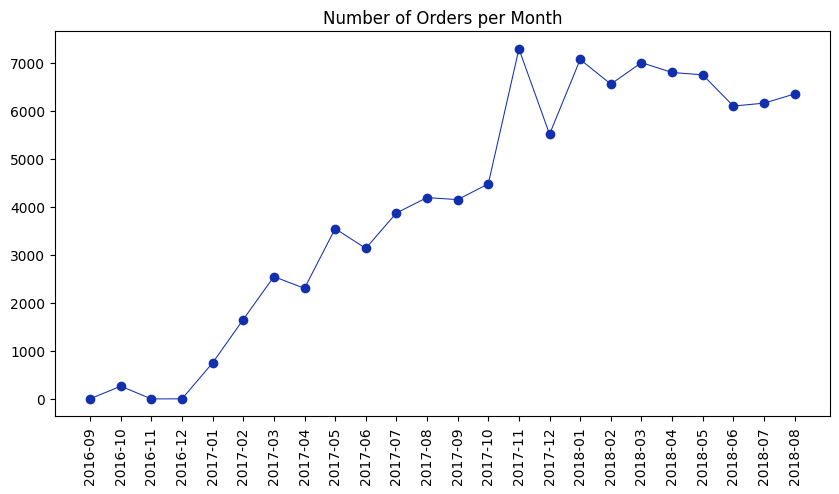

In [102]:
# Visualize the number of orders each month in a line chart
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_month"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=0.75,
    color="#1230AE"
)
plt.title("Number of Orders per Month", loc="center", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

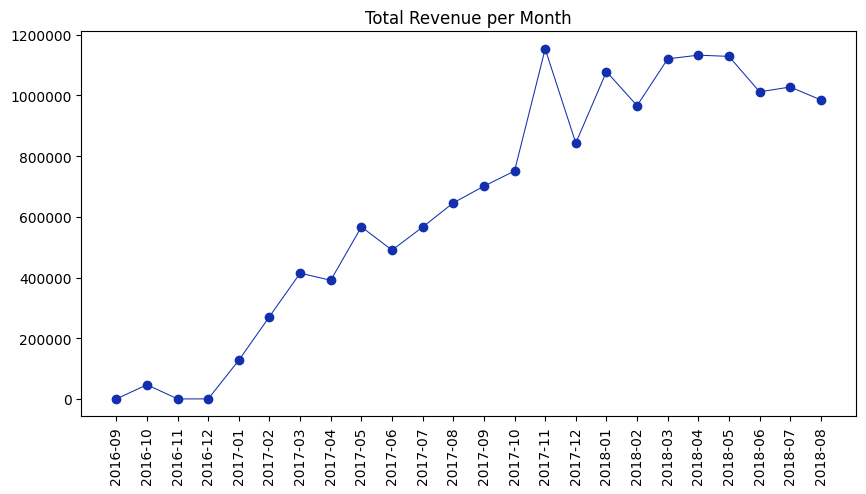

In [103]:
# Visualize total revenue each month in a line chart
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_month"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=0.75,
    color="#1230AE"
)
plt.title("Total Revenue per Month", loc="center", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

### Question 2: **What product categories sell the most, sell the least, and are the most profitable?**

In [104]:
# Get the sales and revenue amount of each product category into a new variable
sum_order_items_df = orders_order_items_products_category_df.\
    groupby(by="product_category_name_english").agg({
        "product_id": "nunique",
        "price": "sum"
    })

sum_order_items_df = sum_order_items_df.reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english": "product_category",
    "product_id": "count",
    "price": "revenue"
}, inplace=True)

sum_order_items_df

,product_category,count,revenue
0,agro_industry_and_commerce,74,72530.47
1,air_conditioning,124,55024.96
2,art,55,24202.64
3,arts_and_craftmanship,19,1814.01
4,audio,58,50688.50
...,...,...,...
68,stationery,849,230943.23
69,tablets_printing_image,9,7528.41
70,telephony,1134,323667.53
71,toys,1411,483946.60


In [105]:
sum_order_items_df.sort_values(by="revenue", ascending=False)

,product_category,count,revenue
43,health_beauty,2444,1258681.34
7,bed_bath_table,3639,1216523.96
72,watches_gifts,1329,1205005.68
67,sports_leisure,2867,988048.97
15,computers_accessories,1639,911954.32
...,...,...,...
35,flowers,14,1110.04
46,home_comfort_2,5,760.27
11,cds_dvds_musicals,1,730.00
29,fashion_childrens_clothes,5,569.85


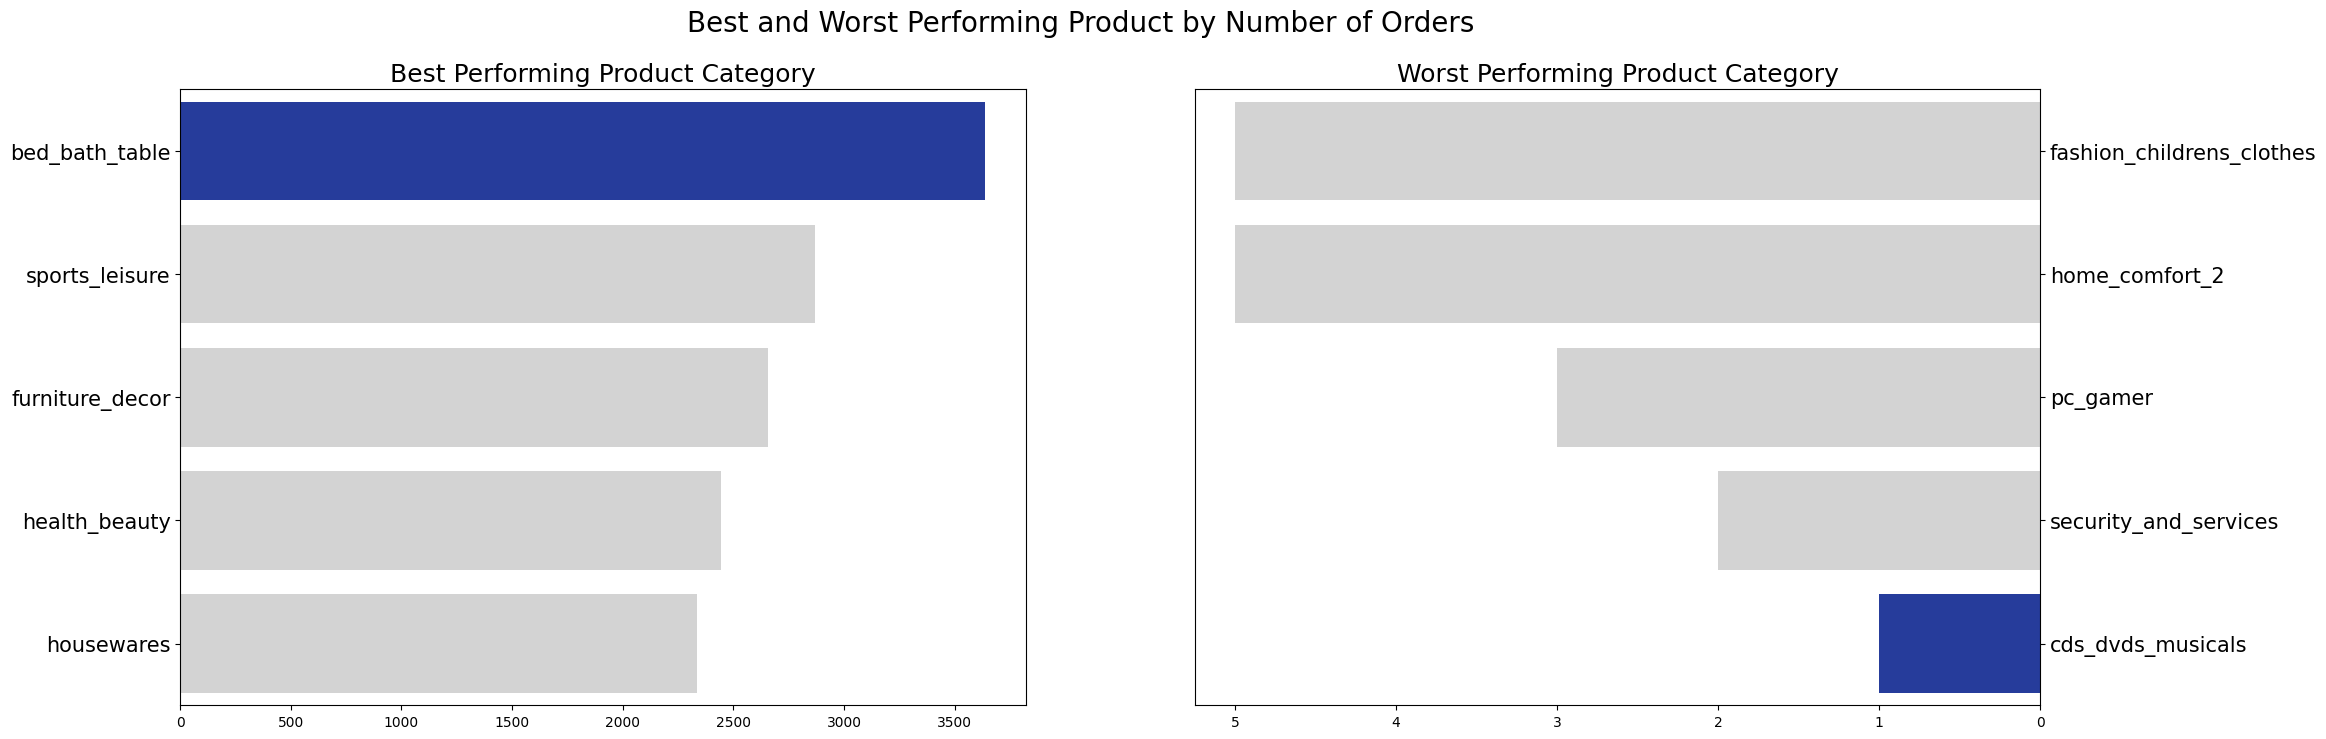

In [106]:
# Visualize products with the highest and lowest total orders in a bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors_1 = ["#1230AE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="count", y="product_category", data=sum_order_items_df.sort_values(by="count", ascending=False).head(5), palette=colors_1, ax=ax[0], hue="product_category")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Category", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

colors_2 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#1230AE"]
sns.barplot(x="count", y="product_category", data=sum_order_items_df.sort_values(by="count", ascending=False).tail(5), palette=colors_2, ax=ax[1], hue="product_category")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Category", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Orders", fontsize=20)
plt.show()

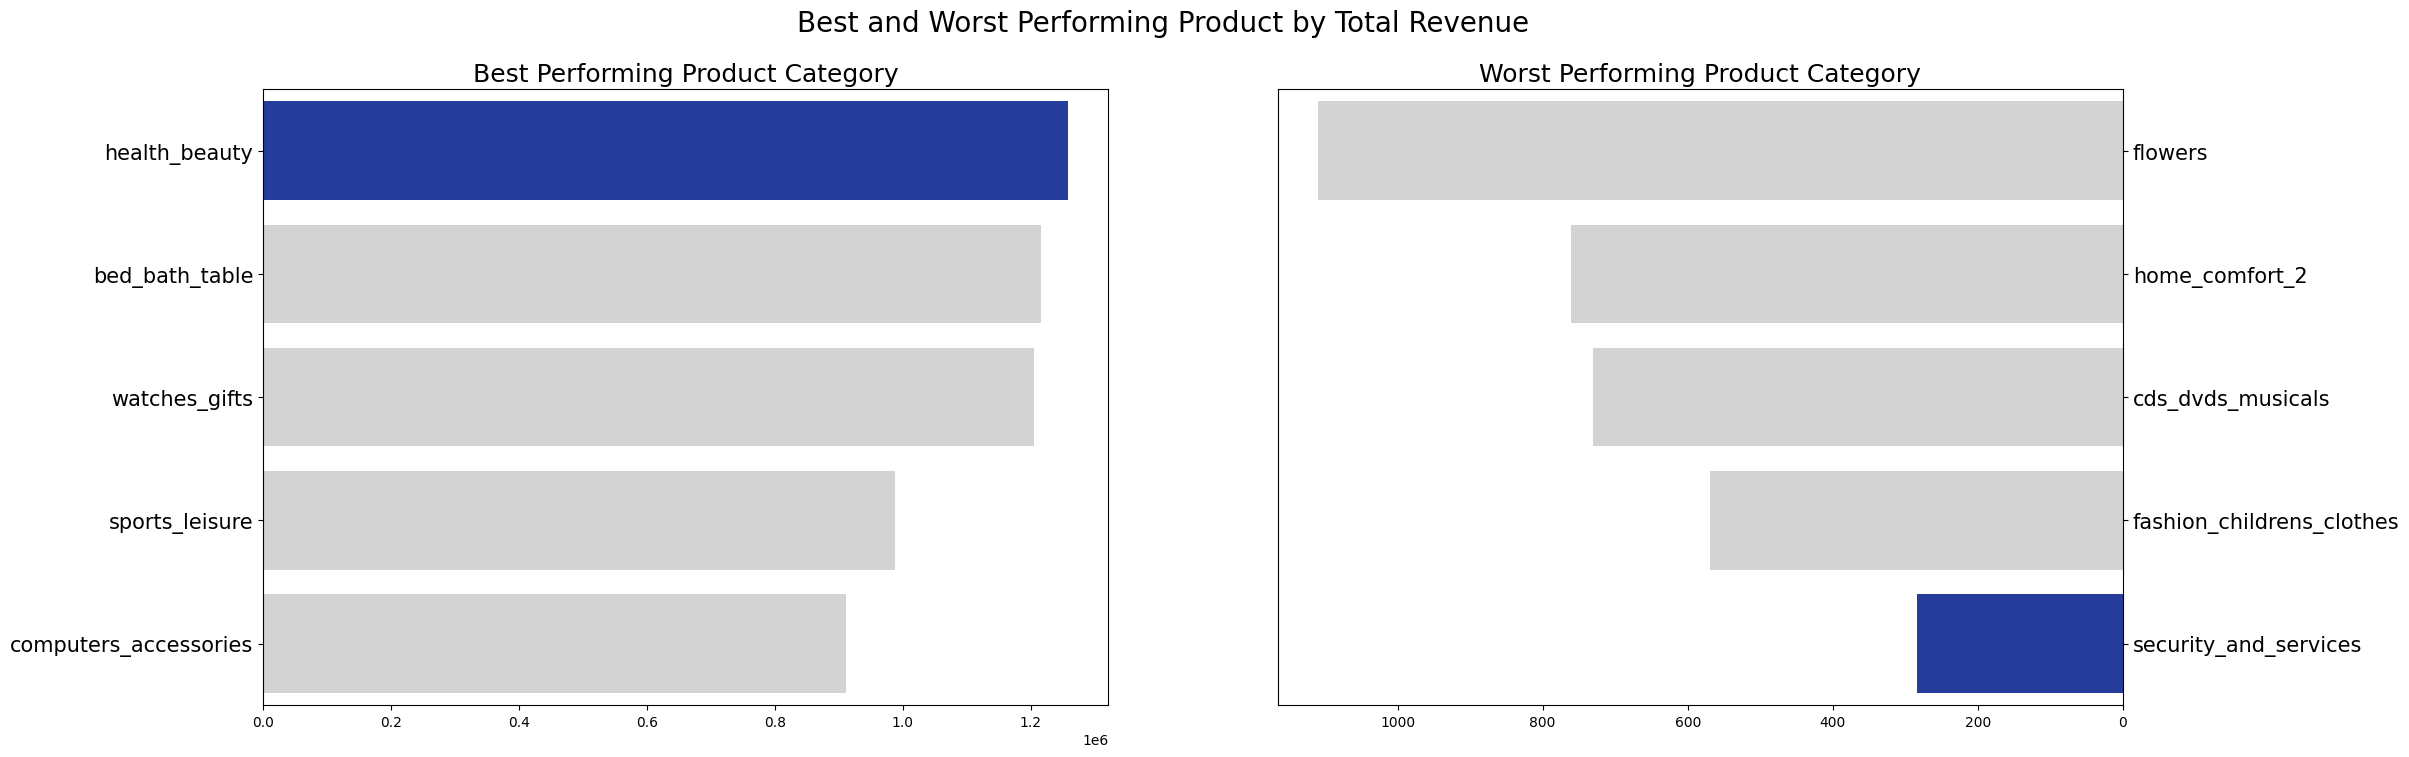

In [107]:
# Visualize products with the highest and lowest total revenue in a bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors_1 = ["#1230AE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="revenue", y="product_category", data=sum_order_items_df.sort_values(by="revenue", ascending=False).head(5), palette=colors_1, ax=ax[0], hue="product_category")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Category", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

colors_2 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#1230AE"]
sns.barplot(x="revenue", y="product_category", data=sum_order_items_df.sort_values(by="revenue", ascending=False).tail(5), palette=colors_2, ax=ax[1], hue="product_category")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Category", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Total Revenue", fontsize=20)
plt.show()

### Question 3: **What payment methods are the most and least used?**

In [108]:
# Get the number of uses of each type of payment method into a new variable
payment_type_df = order_customers_payments_df["payment_type"].value_counts().sort_values(ascending=False)
payment_type_df.to_frame()
payment_type_df = payment_type_df.reset_index()
payment_type_df

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [109]:
# Get the number of orders that use installments and do not use installments into a new variable.
payment_installments_df = order_customers_payments_df["payment_installments"].value_counts().sort_values(ascending=False)
payment_installments_df.to_frame()
payment_installments_df = payment_installments_df.reset_index()

payment_installments_df["use_installment"] = payment_installments_df["payment_installments"].apply(lambda x: True if x > 1 else False)
payment_installments_df = payment_installments_df.groupby(by="use_installment")["count"].sum()
payment_installments_df.to_frame()
payment_installments_df = payment_installments_df.reset_index().sort_values(by="count", ascending=False)

payment_installments_df

,use_installment,count
0,False,52548
1,True,51338


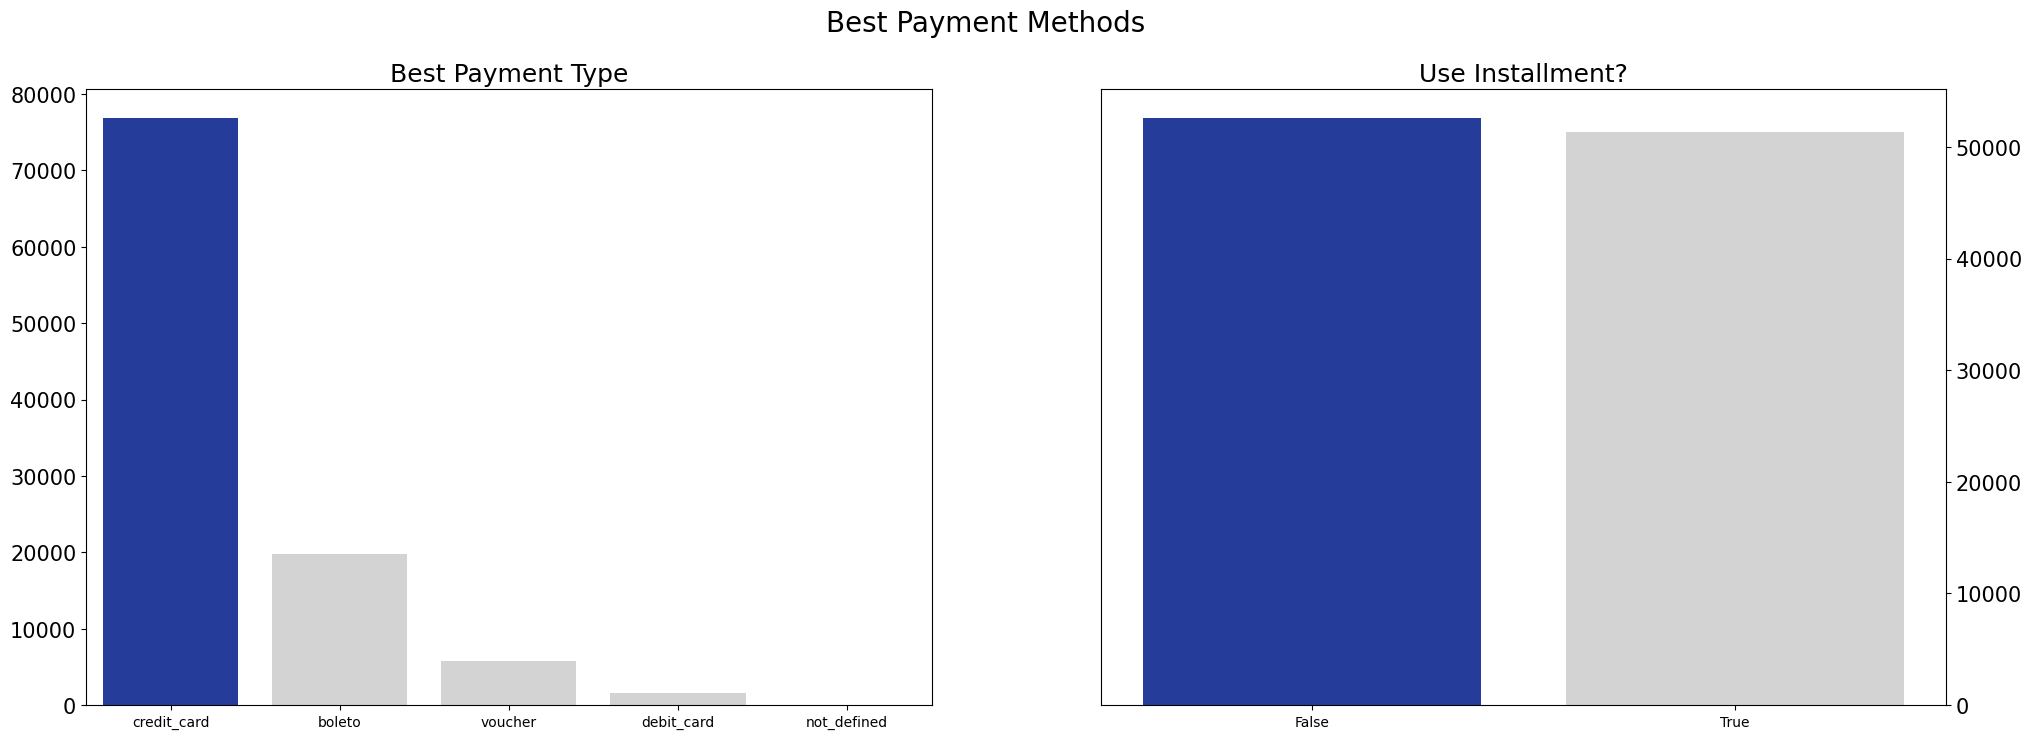

In [110]:
# Visualization of the amount of usage of each payment method and the amount of installment usage
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors_1 = ["#1230AE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="payment_type", y="count", data=payment_type_df.head(5), palette=colors_1, ax=ax[0], hue="payment_type")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Payment Type", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

colors_2 = ["#1230AE", "#D3D3D3"]
sns.barplot(x="use_installment", y="count", data=payment_installments_df.head(5), palette=colors_2, ax=ax[1], hue="use_installment", legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Use Installment?", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Payment Methods", fontsize=20)
plt.show()

### Question 4: **Which city or state has the most orders and money spent coming from?**

In [111]:
# Get the number of orders and total revenue in each customer's origin city into a new variable
customer_order_revenue_city = order_customers_payments_df.groupby(by="customer_city").agg({
    "order_id" : "nunique",
    "payment_value": "sum"
}).reset_index().sort_values(by="order_id", ascending=False)

customer_order_revenue_city.rename(columns={
    "customer_city": "customer_city",
    "order_id": "order",
    "payment_value": "revenue"
}, inplace=True)

customer_order_revenue_city

,customer_city,order,revenue
3597,sao paulo,15540,2203373.09
3155,rio de janeiro,6882,1161927.36
453,belo horizonte,2773,421765.12
558,brasilia,2131,354216.78
1143,curitiba,1521,247392.48
...,...,...,...
31,agisse,1,56.37
4059,vieiras,1,345.15
469,bertopolis,1,82.12
1,abadiania,1,1025.52


In [112]:
# Get the number of orders and total revenue in each customer's home state into a new variable 
customer_order_revenue_state = order_customers_payments_df.groupby(by="customer_state").agg({
    "order_id" : "nunique",
    "payment_value": "sum"
}).reset_index().sort_values(by="order_id", ascending=False)

customer_order_revenue_state.rename(columns={
    "customer_state": "customer_state",
    "order_id": "order",
    "payment_value": "revenue"
}, inplace=True)

customer_order_revenue_state

,customer_state,order,revenue
25,SP,41746,5998226.96
18,RJ,12852,2144379.69
10,MG,11635,1872257.26
22,RS,5466,890898.54
17,PR,5045,811156.38
23,SC,3637,623086.43
4,BA,3380,616645.82
6,DF,2140,355141.08
7,ES,2033,325967.55
8,GO,2020,350092.31


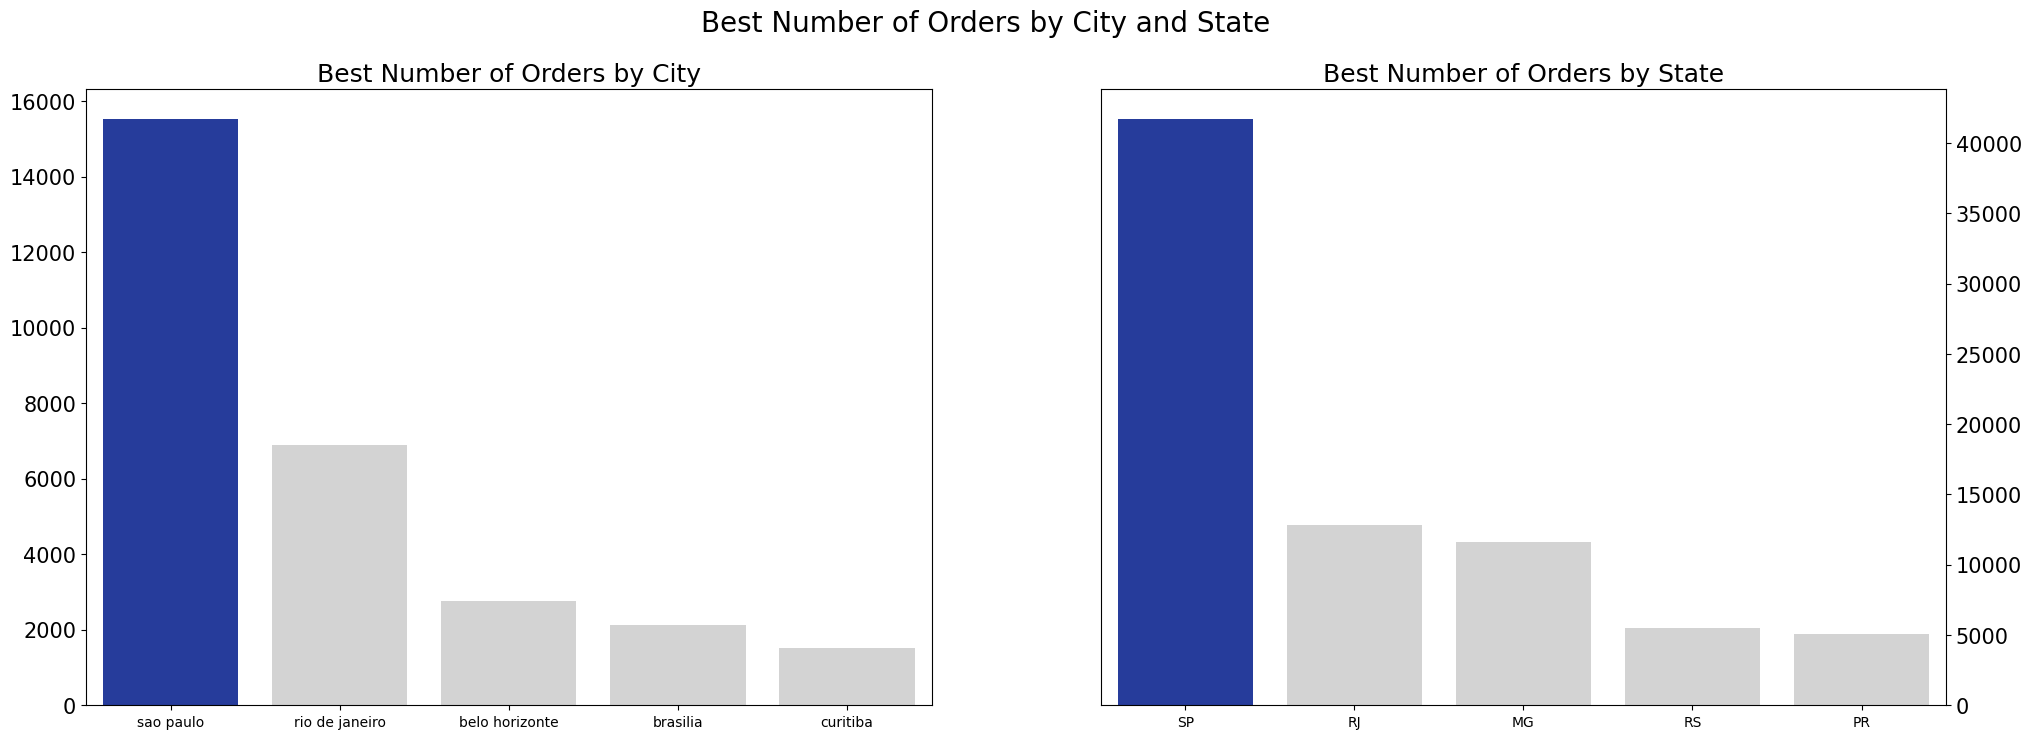

In [113]:
# Visualize the number of orders in each city and state where customers come from
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
colors = ["#1230AE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_city", y="order", data=customer_order_revenue_city.sort_values(by="order", ascending=False).head(5), palette=colors, ax=ax[0], hue="customer_city")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Number of Orders by City", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="customer_state", y="order", data=customer_order_revenue_state.sort_values(by="order", ascending=False).head(5), palette=colors, ax=ax[1], hue="customer_state")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Best Number of Orders by State", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Number of Orders by City and State", fontsize=20)
plt.show()

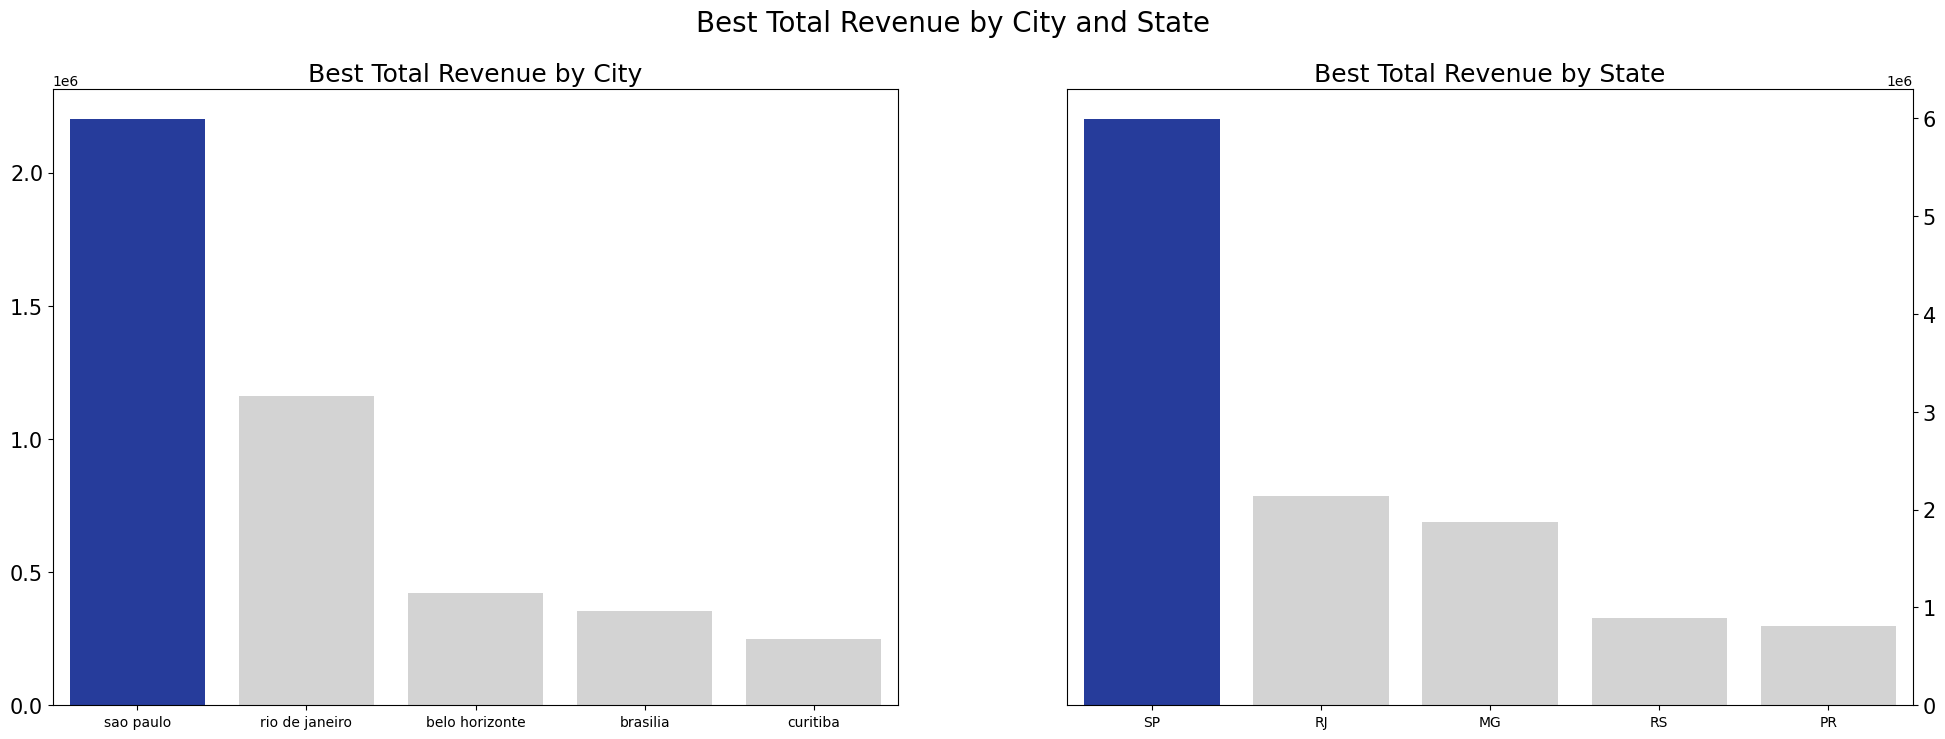

In [114]:
# Visualization of total revenue in each city and state where customers come from
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))
colors = ["#1230AE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_city", y="revenue", data=customer_order_revenue_city.sort_values(by="revenue", ascending=False).head(5), palette=colors, ax=ax[0], hue="customer_city")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Total Revenue by City", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="customer_state", y="revenue", data=customer_order_revenue_state.sort_values(by="revenue", ascending=False).head(5), palette=colors, ax=ax[1], hue="customer_state")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Best Total Revenue by State", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Total Revenue by City and State", fontsize=20)
plt.show()

### Question 5: **What is the level of customer satisfaction with the buying and selling process / products provided?**

In [115]:
# View customer review content
order_reviews_df[~order_reviews_df["review_comment_message"].isna()].\
    sort_values(by="review_creation_date", ascending=False).reset_index()\
    [["review_score", "review_comment_title", "review_comment_message"]]

,review_score,review_comment_title,review_comment_message
0,1,Entrega faltando produtos,Fiz pedido de 6 produtos e só recebi 2.
1,5,10,Linda ...amei
2,1,Muito frágil !!!,"Achei o produto muito pequeno e onde fica a ""t..."
3,5,Ótimo serviço e segurança,O produto veio bem antes do prazo de entrega e...
4,5,Muito bom,Otimo
...,...,...,...
40972,5,NaN,O pedido foi entregue antes do prazo pr0metido
40973,4,NaN,Só chegou uma parte do pedido ate agora..
40974,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA"
40975,1,NaN,nao recebi o produto e nem resposta da empresa


In [116]:
# Get the sum of customer review scores into a new variable
customer_scores_df = order_reviews_df["review_score"].value_counts()
customer_scores_df.to_frame()
customer_scores_df = customer_scores_df.reset_index()
customer_scores_df["satisfaction"] = customer_scores_df["review_score"].apply(lambda x: "satisfied" if x >= 4 else "not satisfied")
customer_scores_df = customer_scores_df.sort_values(by="review_score", ascending=True)
customer_scores_df

,review_score,count,satisfaction
2,1,11424,not satisfied
4,2,3151,not satisfied
3,3,8179,not satisfied
1,4,19142,satisfied
0,5,57328,satisfied


In [117]:
# Get the number of satisfied customers (score 4-5) and dissatisfied (score 1-3) into a new variable
satisfied_df = customer_scores_df.groupby(by="satisfaction")["count"].sum()
satisfied_df.to_frame()
satisfied_df = satisfied_df.reset_index()
satisfied_df

,satisfaction,count
0,not satisfied,22754
1,satisfied,76470


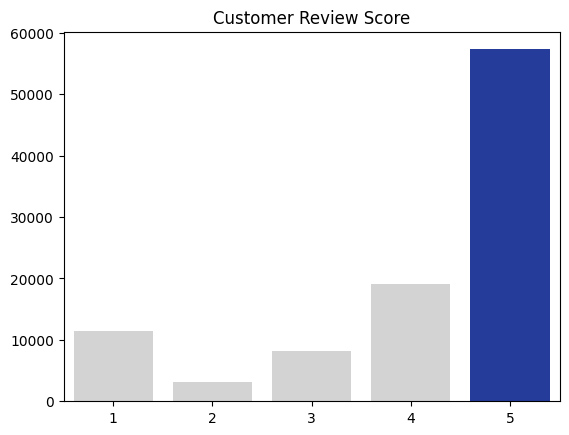

In [118]:
# Visualize customer review scores using bar charts
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors[int(customer_scores_df["count"].argmax())] = "#1230AE"

sns.barplot(x="review_score", y="count", data=customer_scores_df, palette=colors, hue="review_score", legend=False)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Customer Review Score", loc="center", fontsize=12)
plt.tick_params(axis='y', labelsize=10)

**Insight:**
- Using the visualizations that have been created can make it easier for others to understand the story / insight that is being conveyed.
- Each business question has been successfully answered using data and visualization diagrams.
- The answer to the first question is visualized using a line chart showing changes in the number of orders and total revenue.
- The answer to the second question is visualized using a bar chart showing which product categories have the largest and smallest number of orders and revenue.
- The answer to the third question is visualized using a bar chart showing the payment method category with the most use, as well as the number of transactions using installments and not.
- The answer to the fourth question is visualized using a bar chart showing the cities and states with the highest number of orders and revenue.
- The answer to the fifth question is visualized using a bar chart showing the level of customer satisfaction based on a score of 1-5.

## **Advanced Analysis (Optional)**

### **Question 6-8: RFM (Recency, Frequency, Monetary)**

RFM analysis is a technique in data analysis used to group customers based on three main measures:

- Recency: When was the last time the customer made a transaction (example 10 days ago)
- Frequency: How often the customer makes a transaction in a certain period (example 5 times).
- Monetary: What is the total value of transactions made by the customer (example Rp100,000).

By knowing the value of these three measurements, the company can use them to understand customer behavior (how often they shop, when they usually shop, how much shopping they usually buy). In addition, this RMF value can also be used to create customer segmentation, namely dividing customers into several groups based on the same characteristics. This is very useful for companies to develop a more focused marketing strategy. Therefore, by analyzing this RFM value, the company can make more effective business decisions.

In [119]:
# Get the last purchase date, number of purchases, and total purchase price of each unique customer into a new variable.
rfm_df = order_customers_payments_df[order_customers_payments_df["order_status"] == "delivered"].\
    groupby(by="customer_unique_id", as_index=False).agg({
        "order_purchase_timestamp": "max",
        "order_id": "nunique",
        "payment_value": "sum"
    })

rfm_df.columns = ["customer_id", "max_order_purchase_timestamp", "frequency", "monetary"]

print(rfm_df.info())
display(rfm_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   93358 non-null  object        
 1   max_order_purchase_timestamp  93358 non-null  datetime64[ns]
 2   frequency                     93358 non-null  int64         
 3   monetary                      93358 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.8+ MB
None


,customer_id,max_order_purchase_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89


In [120]:
# Calculate when the customer last made a transaction (day)
rfm_df["max_order_purchase_timestamp"] = rfm_df["max_order_purchase_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_purchase_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_purchase_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


In [121]:
# Calculate the mean value of customer recency, frequency, and monetary
avg_recency = round(rfm_df.recency.mean(), 1)
avg_frequency = round(rfm_df.frequency.mean(), 2)
avg_monetary = round(rfm_df.monetary.mean(), 2)

print("Average recency   : {} (hari)".format(avg_recency))
print("Average frequency : {}".format(avg_frequency))
print("Average monetary  : {} (R$)".format(avg_monetary))

Average recency   : 286.5 (hari)
Average frequency : 1.03
Average monetary  : 165.2 (R$)


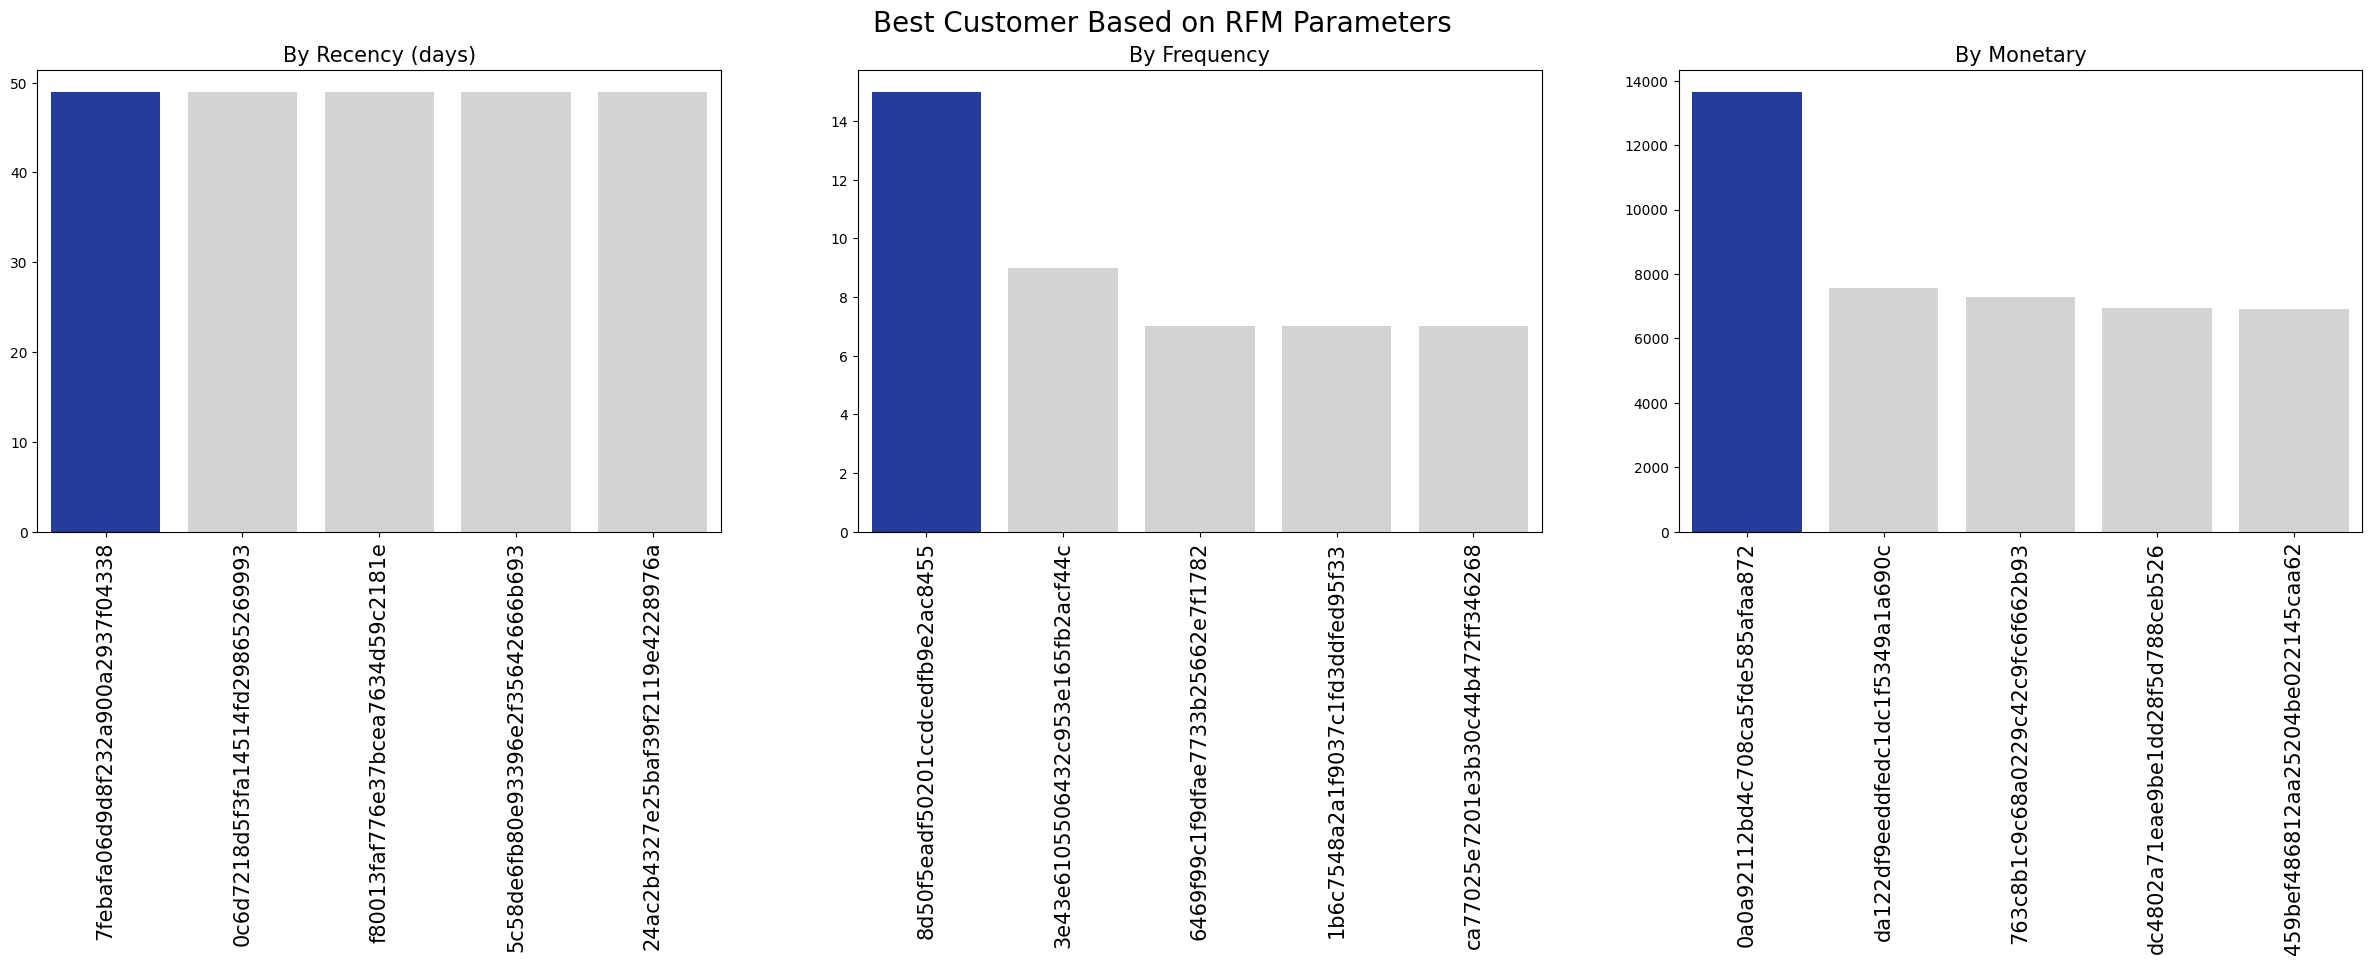

In [122]:
# Displays customer_unique_id that have the highest frequency, monetary, and recency.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#1230AE", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0], hue="customer_id")
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1], hue="customer_id")
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2], hue="customer_id")
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

## **Conclusion**

- **How ​​has the company's sales and revenue performed in the last few months?**
    
    The insights and visualizations that have been produced show that the company's sales and revenue in the last few months (around 2 years) have shown good growth. This is evidenced by the line chart visualization that is moving up. The highest sales were at 7289 and the highest revenue was at 1,153,528.05. Both occurred in November 2017. This is very different from the initial sales and revenue in September 2016 which only recorded 1 sale and did not record any revenue.
    
    With the significant growth in sales and revenue over the past two years, the company has a great opportunity to further develop its business. The company can develop a more aggressive strategy to increase the company's sales and revenue.

- **What product categories sell the most, sell the least, and make the most money?**

    The insights and visualizations that have been generated show that the product category "bed_bath_table" is ranked first as the product category with the most sales, which is 3639 products, followed by "sports_leisure" (2867), "furniture_decor" (2657), and "health_beauty" (2444). Meanwhile, the product with the least sales is "cds_dvds_musicals" which only sold 1 product.

    Although the product that sells the most is held by the "bed_bath_table" category, the product with the highest income for the company is held by the "health_beauty" category which generated a total income of 1,258,681.34. For "bed_bath_table" itself is in second place with a total revenue of 1,216,523.96, followed by "watches_gifts" (1,205,005.68) and "sports_leisure" (988,048.97). Meanwhile, the product category that has the least revenue for the company is "security_and_services" with a total of 2 sales and generating revenue of only 283.29.

    The company can use this insight to optimize its business strategy. By understanding that the "health_beauty" category provides a significant revenue contribution even though the number of products is not as many as "bed_bath_table", the company can focus on developing new products in this category. In addition, the company also needs to re-evaluate the performance of the "cds_dvds_musicals" and "security_and_services" categories because their contribution to revenue is very small.

- **What payment methods are used the most and least?**

    The insights and visualizations that have been produced show that as many as 76,795 transactions were made using "credit_card" as the most favorite payment method, followed by "boleto" (ticket) with 19,784 transactions, "voucher" with 5,775 transactions, and "debit_card" with 1,529 transactions. This shows that 74% of transactions are made using "credit_card". In addition, the results of the analysis show that as many as 49% of customers use installments to pay for their purchases.

    Companies can take advantage of this behavior to attract more customers and retain customers as loyal customers by collaborating with banks to provide promos when using "credit_card" or using installments, to creating special loyalty programs.

- **Where is the city or state with the most orders and spending money coming from?**

    The insights and visualizations that have been generated show that Sao Paulo is the city with the most orders for the company, with a total of 15,540 orders. This city is also the city with the highest revenue contributor for the company, which is 2,203,373.09. The other cities are Rio de Janeiro (6,882 and 1,161,927.36), Belo Horizonte (2,773 and 4,21765.12), and Brasilia (2,131 and 354,216.78).

    Meanwhile, the state with the most orders for the company is SP, with a total of 41,746 orders, and is also the state with the highest revenue contributor for the company, which is 5,998,226.96. Other states are RJ (12852 and 2,144,379.69), MG (11635 and 1,872,257.26), and RS (5466 and 890,898.54).

    By knowing very detailed data on the distribution of orders and revenue by city and state, companies can take strategic steps to improve their business performance, one of which is by focusing marketing and sales efforts in the best performing cities such as Sao Paulo and Rio de Janeiro.

- **What is the level of customer satisfaction with the buying and selling process / products provided?**

    The insights and visualizations that have been produced show that customers tend to be satisfied with the buying/selling process or products that have been purchased through the company. This is evidenced by the number of customer review scores with 5 stars ranking first at 57,328, followed by 4 stars (19,142), 1 star (11,424), 3 stars (8,179), and 2 stars (3,151). By grouping 4 and 5 stars as the satisfied category, and 1 to 3 stars as the dissatisfied category, the company gets a total of 77% satisfied customers and 23% dissatisfied customers.

    Although more than 70% of customers expressed satisfaction, the company needs to pay serious attention to the 23% of dissatisfied customers. The significant number of negative reviews, especially in the 1-star category, indicates that there are still problems that need to be addressed immediately in the company's services or sellers in the company's marketplace. Companies need to conduct a more in-depth analysis of negative reviews to identify the root causes of customer dissatisfaction and determine appropriate improvement strategies.

- **When was the last time each registered customer made a transaction? (Recency)**

    Based on the RFM analysis that has been carried out, the average customer Recency value is 286.5 days. This shows that the average customer last made a transaction around 286.5 days ago, or around 9 months ago. This value indicates that there is a low frequency of purchases by the same person in the company's marketplace. This is a signal of several problems, such as the company's products or services being less attractive, a less than satisfactory shopping experience, and a lack of personalization. Therefore, the company must take this finding seriously by finding the root of the problem and creating a handling strategy.

- **How ​​often has each registered customer made a purchase in the last few months? (Frequency)**

    Based on the RFM analysis that has been carried out, the average customer Frequency value is 1.03. This shows that the average customer only shops once in the company's marketplace. This value supports the Recency value which states that the average customer's last purchase was 9 months ago. This combination of low Recency and Frequency values ​​indicates a serious problem in customer retention. Customers do not seem interested in making repeat purchases in the company's marketplace. Therefore, the company must take this finding seriously by finding the root of the problem and creating a handling strategy.

- **How ​​much money has each registered customer spent in the last few months? (Monetary)**

    Based on the RFM analysis that has been carried out, the average Monetary value of customers is 165.2. This shows that the average transaction made by each customer generates an income of 165.2 for the company. With this finding, the company can get a clear picture of how much each customer contributes to business revenue. The company needs to further assess this Monetary value, such as whether it is in accordance with the company's expectations? And how does it compare to the monetary value of competitors. By further assessing the monetary value, the company can identify better strategies and opportunities to increase the monetary value.